# Simulation of BB84 Quantum Key Distribution (QKD) with Eavesdropping

## Introduction
The **BB84 Protocol**, developed by Charles Bennett and Gilles Brassard in 1984, is the first quantum cryptography protocol. It allows two parties (Alice and Bob) to create a shared, secret key. Its security relies on the fundamental principles of Quantum Mechanics: **the No-Cloning Theorem** and the fact that measuring a quantum state generally disturbs it.

### The Scenario
In this notebook, we simulate the BB84 protocol using `Qiskit`. However, we introduce a third party, **Eve (the Eavesdropper)**.
1. **Alice** prepares qubits in random bases ($Z$ or $X$).
2. **Eve** intercepts the qubits, measures them in a random basis, and sends them to Bob.
3. **Bob** receives the qubits and measures them in his own random bases.
4. Alice and Bob compare their bases (Sifting) and calculate the **Quantum Bit Error Rate (QBER)**.

If Eve is present, her measurements will collapse the quantum states, introducing statistical errors in the key shared by Alice and Bob. We expect a QBER of approximately **25%** if Eve intercepts every qubit.

In [1]:
#Imports
from random import randint #You can also use numpy library to use random
from random import choice
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import IGate, XGate, YGate, ZGate, HGate

## Step 1: Alice Generates Bits and Bases
Alice needs to generate two sets of random data:
1. **The Bitstring:** The actual data (0s and 1s) she wants to send.
2. **The Bases:** The orientation she uses to encode the bits. 
   - **Z-basis:** Encodes 0 as $|0\rangle$ and 1 as $|1\rangle$.
   - **X-basis:** Encodes 0 as $|+\rangle$ and 1 as $|-\rangle$.

In [2]:
#Alice's bitstring
n=20 # No of qubits(Upto 27 qubits only)

#Generate Random bits
bits=[]
for i in range(n):
    bit=randint(0,1)
    bits.append(bit)
print("Alice's bits: ", bits)

Alice's bits:  [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [3]:
#Alice's base
#Generate random bases ('x' or 'z')
basis=[]
for i in range(n):
    base=choice(["x","z"])
    basis.append(base)
print(f"Alice's bases:{basis}")

Alice's bases:['x', 'x', 'x', 'z', 'x', 'x', 'z', 'x', 'z', 'x', 'z', 'x', 'x', 'z', 'z', 'z', 'z', 'x', 'x', 'z']


## Step 2: Quantum Circuit Construction
We initialize the quantum circuit. 
* **Alice** encodes her bits according to the chosen basis.
* If the bit is `1`, she applies an **X-gate** (bit-flip).
* If the basis is `x`, she applies an **H-gate** (Hadamard) to change the basis from Z to X.
  

In [4]:
q=QuantumRegister(n)
Bob_c=ClassicalRegister(n, name="Bob" )
Eve_c=ClassicalRegister(n, name="Eve" )
qc=QuantumCircuit(q,Bob_c, Eve_c )

#Alice's state
for i in range(n):
    if basis[i]=="z":
        if bits[i]==0:
            qc.append(IGate(), [q[i]])
        else:
            qc.append(XGate(), [q[i]])
    else:
       if bits[i]==0:
            qc.append(HGate(), [q[i]])
       else:
           qc.append(XGate(), [q[i]])
           qc.append(HGate(), [q[i]])
           
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=20, num_clbits=0, params=[]), qubits=(<Qubit register=(20, "q0"), index=0>, <Qubit register=(20, "q0"), index=1>, <Qubit register=(20, "q0"), index=2>, <Qubit register=(20, "q0"), index=3>, <Qubit register=(20, "q0"), index=4>, <Qubit register=(20, "q0"), index=5>, <Qubit register=(20, "q0"), index=6>, <Qubit register=(20, "q0"), index=7>, <Qubit register=(20, "q0"), index=8>, <Qubit register=(20, "q0"), index=9>, <Qubit register=(20, "q0"), index=10>, <Qubit register=(20, "q0"), index=11>, <Qubit register=(20, "q0"), index=12>, <Qubit register=(20, "q0"), index=13>, <Qubit register=(20, "q0"), index=14>, <Qubit register=(20, "q0"), index=15>, <Qubit register=(20, "q0"), index=16>, <Qubit register=(20, "q0"), index=17>, <Qubit register=(20, "q0"), index=18>, <Qubit register=(20, "q0"), index=19>), clbits=())

## Step 3: Eve's Interception (Man-in-the-Middle)
Here, Eve attempts to steal the key. She intercepts every qubit traveling from Alice to Bob.
* Eve chooses a random basis for each qubit.
* She measures the qubit. **Crucially, this measurement collapses the quantum state.**
* The qubit continues to Bob (effectively "resending" the state Eve measured).

In [5]:
#Eve's interception and measurement
e_basis=[]
for i in range(n):
    e_base=choice(["x", "z"])
    e_basis.append(e_base)
    if e_base=="z":
        qc.measure(q[i], Eve_c[i])
    else:
        qc.append(HGate(), [q[i]])
        qc.measure(q[i], Eve_c[i])
        qc.append(HGate(), [q[i]])
print("Eve bases: ", e_basis)
qc.barrier()

Eve bases:  ['x', 'z', 'x', 'x', 'x', 'z', 'z', 'x', 'x', 'x', 'x', 'z', 'z', 'z', 'x', 'x', 'z', 'x', 'z', 'z']


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=20, num_clbits=0, params=[]), qubits=(<Qubit register=(20, "q0"), index=0>, <Qubit register=(20, "q0"), index=1>, <Qubit register=(20, "q0"), index=2>, <Qubit register=(20, "q0"), index=3>, <Qubit register=(20, "q0"), index=4>, <Qubit register=(20, "q0"), index=5>, <Qubit register=(20, "q0"), index=6>, <Qubit register=(20, "q0"), index=7>, <Qubit register=(20, "q0"), index=8>, <Qubit register=(20, "q0"), index=9>, <Qubit register=(20, "q0"), index=10>, <Qubit register=(20, "q0"), index=11>, <Qubit register=(20, "q0"), index=12>, <Qubit register=(20, "q0"), index=13>, <Qubit register=(20, "q0"), index=14>, <Qubit register=(20, "q0"), index=15>, <Qubit register=(20, "q0"), index=16>, <Qubit register=(20, "q0"), index=17>, <Qubit register=(20, "q0"), index=18>, <Qubit register=(20, "q0"), index=19>), clbits=())

## Step 4: Bob Receives and Measures
Bob receives the qubits (which may have been altered by Eve). He chooses his own random bases to measure them.

In [6]:
#Bob's bases
B_base=[]
for i in range(n):
    base=choice(["x","z"])
    B_base.append(base)
print(f"Bob's bases:{B_base}")

Bob's bases:['x', 'x', 'x', 'x', 'z', 'x', 'x', 'x', 'z', 'z', 'x', 'z', 'z', 'z', 'z', 'z', 'x', 'x', 'x', 'x']


In [7]:
#Bob measures
for i in range(n):
    if B_base[i]=="z":
        qc.measure(q[i],Bob_c[i])
    else:
        qc.append(HGate(),[q[i]])
        qc.measure(q[i],Bob_c[i])


## Step 5: Simulation
We run the circuit on the `QasmSimulator`. We utilize the `memory=True` parameter to get the individual shot results for bit-by-bit comparison.

Measured list (index 0..n-1): [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0]
Counts: {'00110000111001000100 10110100111001100110': 1}


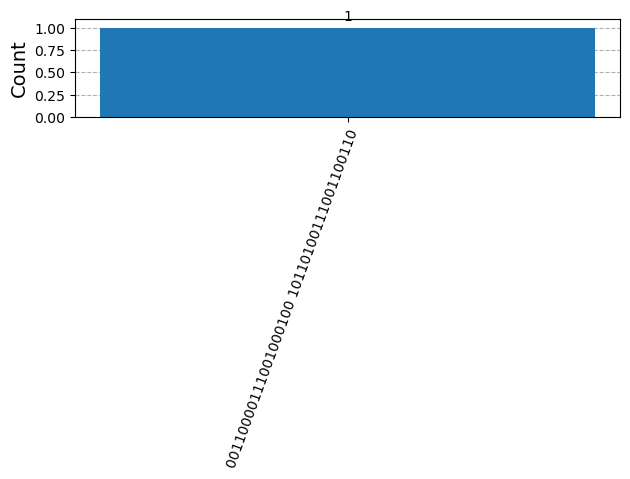

In [8]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit_aer import QasmSimulator
backend= QasmSimulator()
qc_compile=transpile(qc, backend)
job= backend.run(qc_compile, shots=1, memory=True)
result=job.result()

memory= result.get_memory()
raw=memory[0].split()

bob_raw = raw[0] 
eve_raw = raw[1]

# Reverse so index i corresponds to Alice position i
bob_measured = [int(b) for b in bob_raw[::-1]]
eve_measured = [int(b) for b in eve_raw[::-1]]

print("Measured list (index 0..n-1):", bob_measured)

counts=result.get_counts()
print("Counts:",counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Step 6: Sifting and Analysis
Alice and Bob communicate over a classical channel to compare their **bases** (but not their bits). 
1. **Sifting:** They discard bits where their bases did not match.
2. **QBER Calculation:** For the remaining bits (Sifted Key), they compare a subset of their keys to calculate the Error Rate.

**The Math of Eavesdropping:**
* If Eve measures in the **correct** basis (50% chance), she does not alter the state.
* If Eve measures in the **wrong** basis (50% chance), she randomizes the state. Bob then has a 50% chance of measuring the wrong bit even if his basis matches Alice's.
* Expected QBER = $0.5 \times 0.5 = 0.25$ (25%).

In [9]:
#Sifted keys
Alice_sifted=[]
Bob_sifted=[]
matching_positions=[]
for i in range(n):
    if B_base[i]==basis[i]:
        matching_positions.append(i)
        Alice_sifted.append(bits[i])
        Bob_sifted.append(bob_measured[i])

print("Matching positions:", matching_positions)
print("Sifted Alice key:   ", Alice_sifted)
print("Sifted Bob key:     ", Bob_sifted)

#To check Quantum Bit Error Rate(QBER)
if len(Alice_sifted) > 0:
    mismatch = sum(1 for a,b in zip(Alice_sifted, Bob_sifted) if a != b)
    QBER = mismatch / len(Alice_sifted)
    print(f"QBER over sifted key: {QBER:.3f} ({mismatch}/{len(Alice_sifted)} mismatches)")
    #Mismatch rate upto 3 decimals
    print(f"Percentage: {QBER*100:.1f}%")
    if QBER > 0.20:
        print(">> INTERCEPTION DETECTED! (QBER is close to 25%)")
    else:
        print(">> NO INTERCEPTION DETECTED (QBER is low)")
else:
    print("No matching bases. So, no sifted key.")

Matching positions: [0, 1, 2, 5, 7, 8, 13, 14, 15, 17, 18]
Sifted Alice key:    [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]
Sifted Bob key:      [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
QBER over sifted key: 0.455 (5/11 mismatches)
Percentage: 45.5%
>> INTERCEPTION DETECTED! (QBER is close to 25%)
